In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [4]:
# 1. Membaca Dataset
data = pd.read_csv('./dataset/water_potability.csv')



In [5]:
# 2. Pra-pemrosesan Data
# Mengatasi nilai yang hilang dengan menggantinya dengan rata-rata kolom
data.fillna(data.mean(), inplace=True)

# Memisahkan fitur dan target
X = data.drop('Potability', axis=1)
y = data['Potability']

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [6]:
# 3. Membangun Model Klasifikasi
# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)



In [12]:
# 4. Evaluasi Model
# Fungsi untuk mencetak evaluasi dan plot confusion matrix
def evaluasi_model(y_test, y_pred, model_name):
    print(f"Evaluasi Model {model_name}")
    print("Akurasi:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("\n")

Evaluasi Model SVM
Akurasi: 0.6951219512195121
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.92      0.79       412
           1       0.70      0.32      0.44       244

    accuracy                           0.70       656
   macro avg       0.70      0.62      0.61       656
weighted avg       0.70      0.70      0.66       656



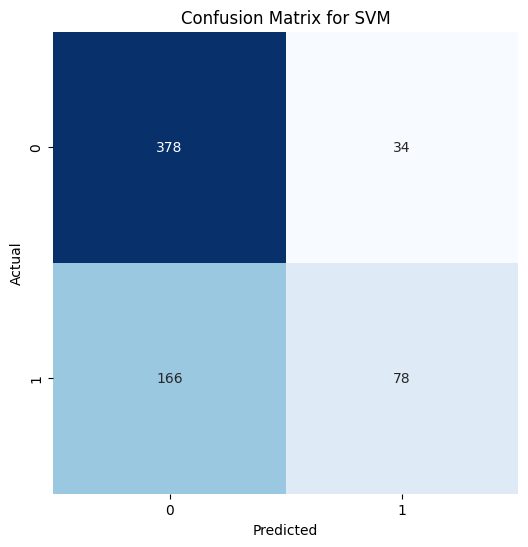

In [17]:
# Evaluasi SVM
evaluasi_model(y_test, y_pred_svm, "SVM")



Evaluasi Model KNN
Akurasi: 0.6280487804878049
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.75      0.72       412
           1       0.50      0.42      0.46       244

    accuracy                           0.63       656
   macro avg       0.59      0.59      0.59       656
weighted avg       0.62      0.63      0.62       656



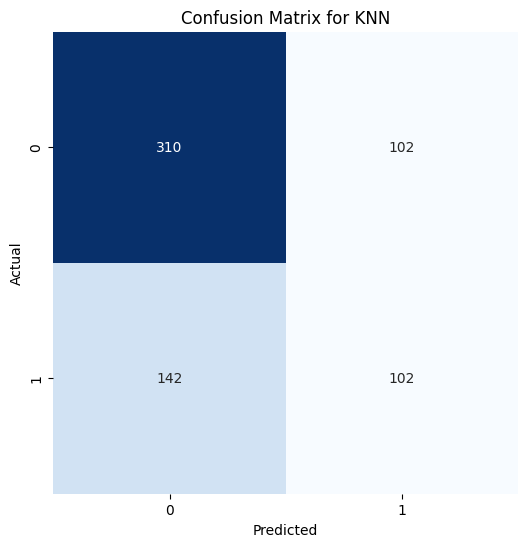

In [18]:
# Evaluasi KNN
evaluasi_model(y_test, y_pred_knn, "KNN")


Evaluasi Model Decision Tree
Akurasi: 0.5746951219512195
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.62      0.65       412
           1       0.44      0.49      0.46       244

    accuracy                           0.57       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.57      0.58       656



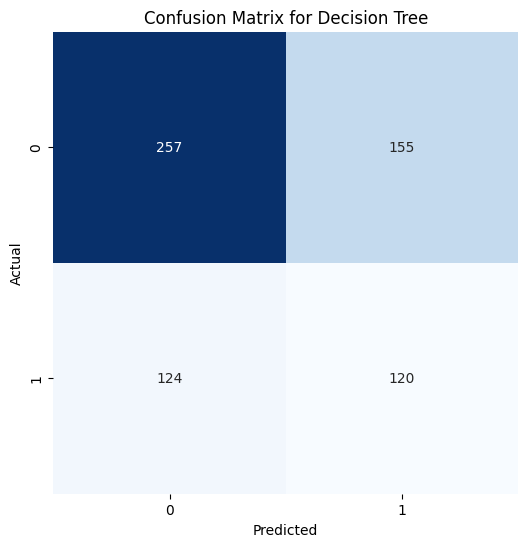

In [19]:

# Evaluasi Decision Tree
evaluasi_model(y_test, y_pred_dt, "Decision Tree")